## Importing required libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\omkar\Downloads\UniversalBank.xls") # data load

In [3]:
df # read data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Cheking for null values

In [4]:
df.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

fetching the null values from the dataset and sum the null values from the column and we dont have null values in data

# drop the irrelavent column

In [5]:
df1 = df.drop(["ID","ZIP Code"],axis=1)
df1

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


droping the irralavent columns from the data which is not related to our target column now we have 5000 rows and 12 columns in dataset

## Heatmap for correlation between the features from dataset

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

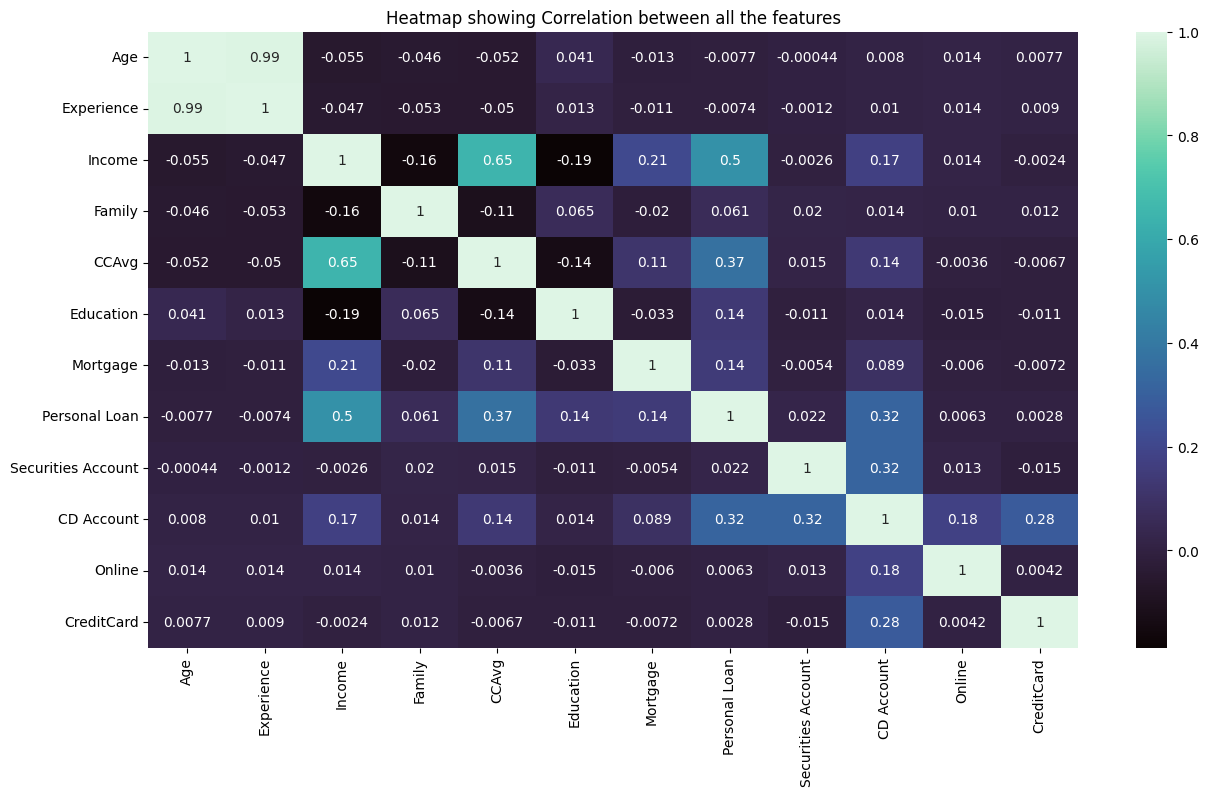

In [6]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features")
sns.heatmap(df1.corr(),annot = True, cmap ='mako')
# making graph to see the correlation of the columns with each other

In [7]:
zero_class = df1[df.CreditCard==0]
zero_class.shape
# creating a variable and chake in how many row have 0 value for Creadic Card column

(3530, 12)

In [8]:
one_class = df1[df.CreditCard==1]
one_class.shape
# creating a variable and chake in how many row have 1 value for Creadic Card column

(1470, 12)

# Income vs Experience scatter plotgraph

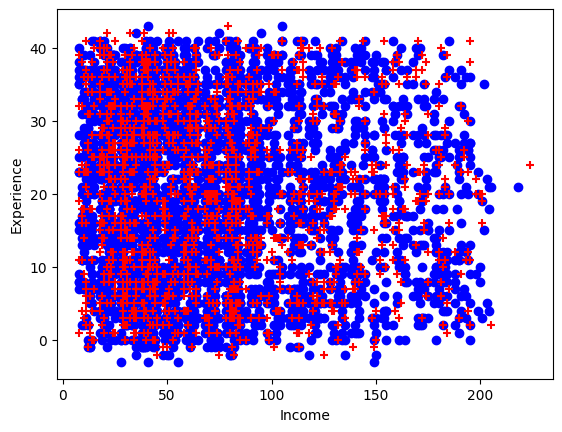

In [9]:
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(zero_class['Income'],zero_class['Experience'],color = 'blue', marker = 'o')
plt.scatter(one_class['Income'],one_class['Experience'],color = 'red', marker = '+')

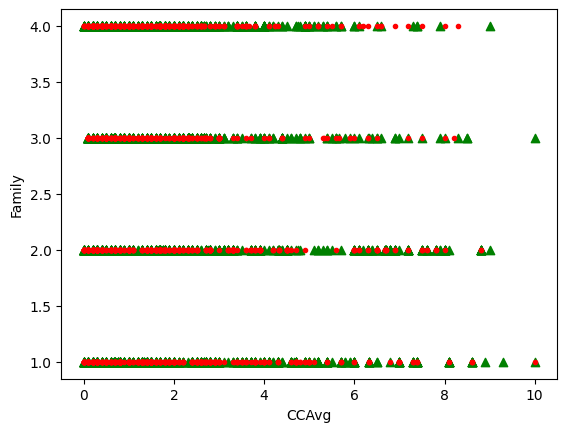

In [10]:
# CCavg vs Family scatter plot
plt.xlabel('CCAvg')
plt.ylabel('Family')
plt.scatter(zero_class['CCAvg'],zero_class['Family'],color = 'green',marker = '^')
plt.scatter(one_class['CCAvg'],one_class['Family'],color = 'red',marker = '.')

# Standardization

In [11]:
# Scalling the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df1.drop('CreditCard', axis = 1)).transform(df1.drop('CreditCard',axis = 1))
df_scaled = pd.DataFrame(scaled, columns = df1.columns[:-1])
df_scaled.head

<bound method NDFrame.head of            Age  Experience    Income    Family     CCAvg  Education  Mortgage  \
0    -1.774417   -1.666078 -0.538229  1.397414 -0.193385  -1.049078 -0.555524   
1    -0.029524   -0.096330 -0.864109  0.525991 -0.250611  -1.049078 -0.555524   
2    -0.552992   -0.445163 -1.363793 -1.216855 -0.536736  -1.049078 -0.555524   
3    -0.901970   -0.968413  0.569765 -1.216855  0.436091   0.141703 -0.555524   
4    -0.901970   -1.055621 -0.625130  1.397414 -0.536736   0.141703 -0.555524   
...        ...         ...       ...       ...       ...        ...       ...   
4995 -1.425438   -1.491662 -0.733757 -1.216855 -0.021710   1.332484 -0.555524   
4996 -1.338194   -1.404454 -1.276892  1.397414 -0.880087  -1.049078  0.280238   
4997  1.540880    1.647835 -1.081363 -0.345432 -0.937312   1.332484 -0.555524   
4998  1.715370    1.735043 -0.538229  0.525991 -0.822862   0.141703 -0.555524   
4999 -1.512683   -1.404454  0.200434  0.525991 -0.651186  -1.049078 -0.555524  

In [12]:
# x as dependent variable and y as indepndent variable
x = df_scaled
y= df1['CreditCard']

## Spliting data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

# Model Selection

In [14]:
#apply svm model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test,y_pred)))

Model accuracy : 0.749


# confusion matrix

<Axes: >

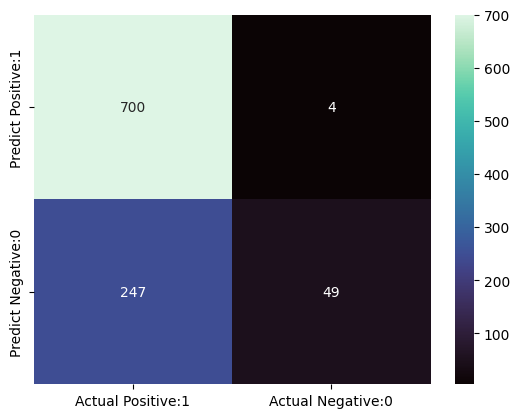

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns = ['Actual Positive:1', 'Actual Negative:0'],index = ['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'mako')

# Classification report

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



# Classification Report

In [19]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.86      0.17      0.29       296

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.68      1000



In [17]:
# applying the SVM model using linear kernal function
linear_classifier = SVC(kernel = 'linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test,y_pred)))

Model accuracy with linear kernel : 0.747


# Confusion Matrix

<Axes: >

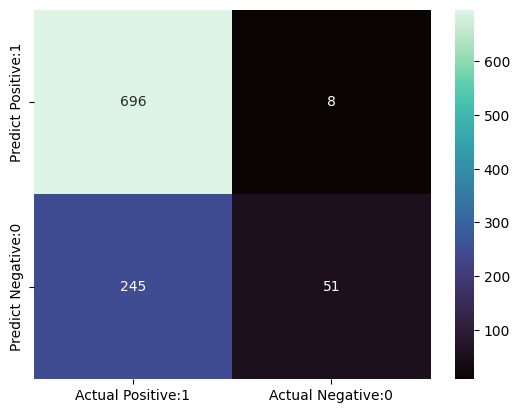

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [20]:
 #Apply SVM model using Gaussian RBF kernel function
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.749


<Axes: >

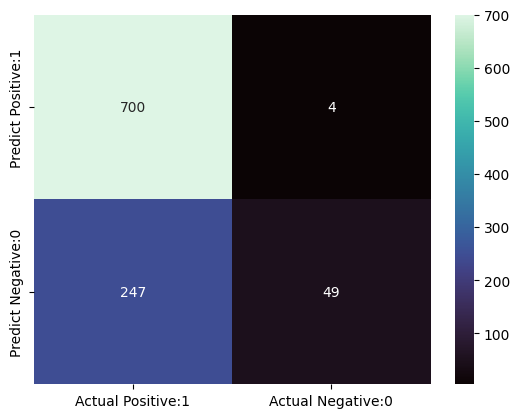

In [21]:

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [23]:
# Apply SVM model using Polynomial Kernel function
Poly_svc=SVC(kernel='poly', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.749


# Classification Report

In [22]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



# Confusion Matrix

<Axes: >

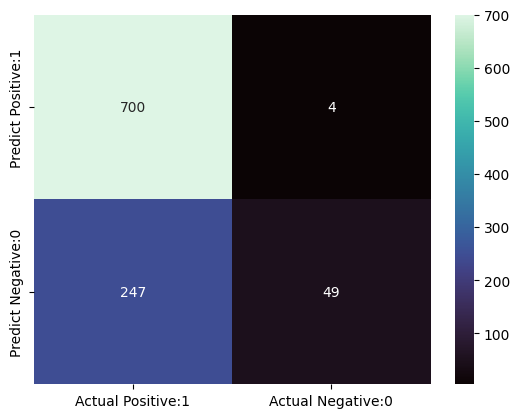

In [24]:

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Classification Report

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



In [26]:
# Apply SVM model using Sigmoid Kernel function
Poly_svc=SVC(kernel='sigmoid', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.629


# Confusion Matrix

<Axes: >

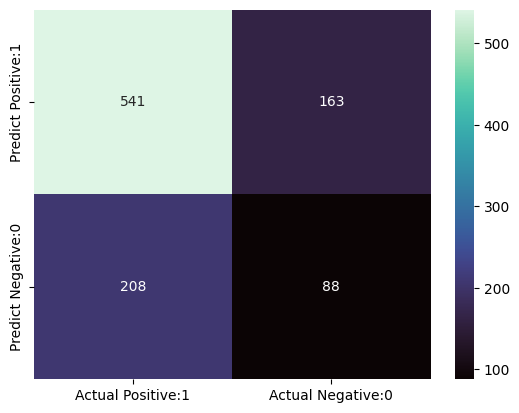

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Classification Report

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       704
           1       0.35      0.30      0.32       296

    accuracy                           0.63      1000
   macro avg       0.54      0.53      0.53      1000
weighted avg       0.61      0.63      0.62      1000

